In [17]:
import math
import random
import statistics as st
import matplotlib.pyplot as plt
import numpy as np

In [18]:
%matplotlib inline


In [66]:
#All speed units will be in meters/sec

class Car:
    def __init__(self, size = 5, speed = 33, location = 0):
        self.size = size
        self.speed = speed
        self.location = location
        
    def check_next_car(self):
        space = []
        for x in range(self.speed+self.size):
            space.append(road.road_map[self.location+x])
        if sum(space) == 0:
            return True
        else:
            return False
    
    def change_speed(self):
        if random.random() <= .10:
            self.speed -= 2
        elif road.road_map[self.location+6] == 1:
            self.speed = 0
        elif self.check_next_car:
            self.speed +=2
            
        
    def move(self):
        self.location += self.speed 
        if self.location > 1000:
            self.location = self.location % 1000
        return self.location
    
    def check_loc(self):
        return("I'm at {}".format(self.location))
    
    


In [67]:
class Road:
    def __init__(self):
        self.cars = [Car() for _ in range(30)]
        self.road_map = np.array([0 for _ in range(1050)])
    
    
    def place_cars_init(self):
        placement = 0
        for car in self.cars:
            car.location = placement
            placement += 30
    
    
    def update_road_map(self):
        self.road_map = np.array([0 for _ in range(1050)])
        for car in self.cars:
            for x in range(5):
                self.road_map[car.location+x] = 1
    
    
    def drive(self):
        for car in self.cars:
            car.change_speed()
        return [car.move() for car in self.cars]
    
    
    def check_cars(self):
        return [car.check_loc() for car in self.cars]
    
    
    def reset(self):
        self.road_map = [0 for _ in range(1000)]
        self.place_cars_init()
        self.update_road_map()

        

In [68]:
class Sim:
    def __init__(self):
        self.ticks = 0
        self.road = Road()

    
    
    def tick(self):
        road_data_sec = np.array(self.road.road_map)
        stats = {'location': self.road.check_cars()}
        self.road.drive()
        self.road.update_road_map()
        return road_data_sec

        
    def reset(self):
        return self.ticks == 0
    
    
    def run(self, num_ticks = 600):
        all_data = []
        self.road.place_cars_init()
        for tick in range(num_ticks):
            all_data.append(self.tick())
            self.ticks += 1
            
        return all_data
        

In [69]:
sim = Sim()
trial_data = sim.run()


NameError: name 'road' is not defined

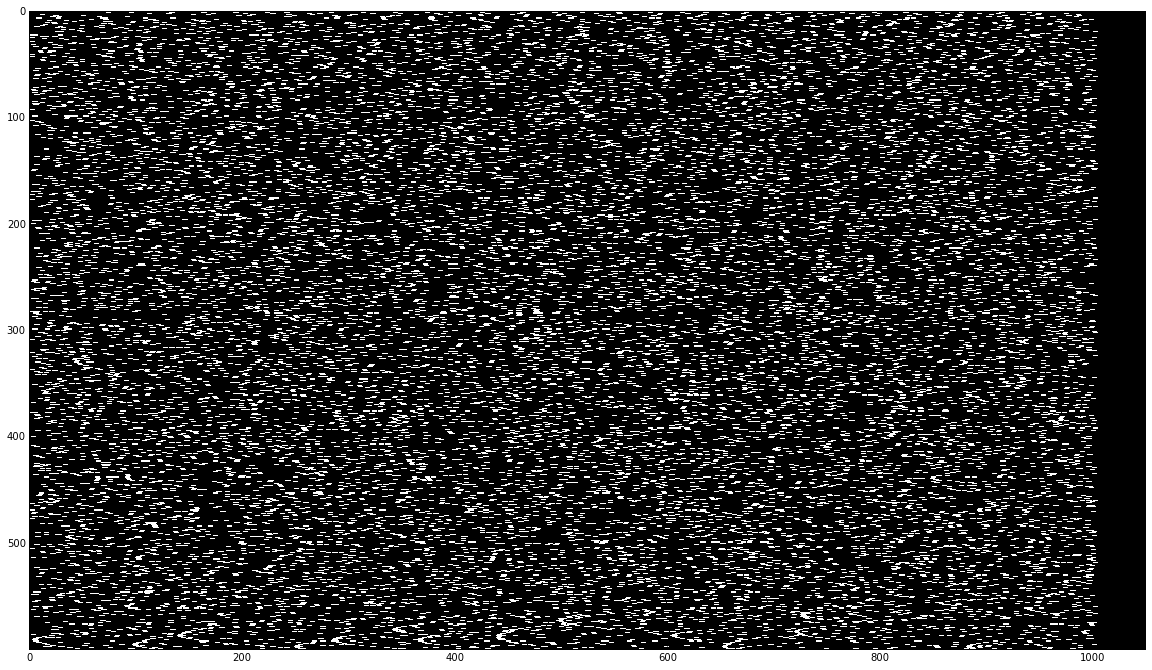

In [57]:
plt.figure(figsize=(20, 20)) # size is in "inches"
plt.imshow(trial_data, cmap='gray', interpolation='nearest')